In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.loadtxt("ex5Data/ex5Logx.dat", delimiter=",")
y=np.loadtxt("ex5Data/ex5Logy.dat")
x.shape,y.shape

((117, 2), (117,))

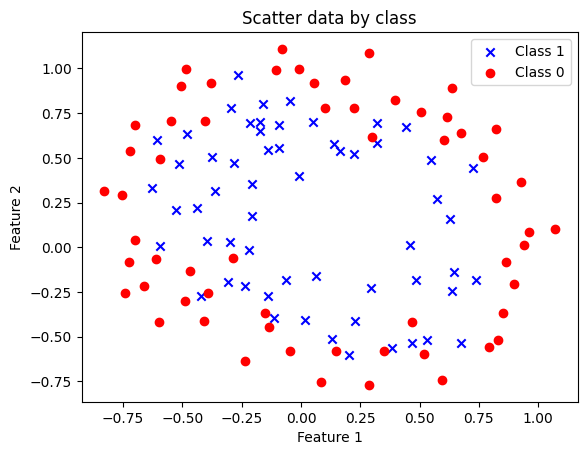

In [7]:
# Separate the data based on the value of y
pos = y == 1
neg = y == 0

# Create the scatter plot
plt.scatter(x[pos, 0], x[pos, 1], c='b', marker='x', label='Class 1')
plt.scatter(x[neg, 0], x[neg, 1], c='r', marker='o', label='Class 0')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Scatter data by class')
plt.show()

In [8]:
def map_feature(u,v):
    degree=6
    out=np.ones(u.shape[0],1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out=np.hstack((out,(u**(i-j)*v**j).reshape(-1,1)))
    return out

In [9]:
def hypothesis(x,w):
    return 1/(1+np.exp(-x.dot(w)))

In [11]:
def cost_funtion_regularize(x,y,w,lam):
    m=x.shape[0]
    h=hypothesis(x,w)
    J=1/m*(-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h)))+lam/(2*m)*w[1:].T.dot(w[1:])
    return J

In [12]:
def gradient_regularize(x,y,w,lam):
    m=x.shape[0]
    h=hypothesis(x,w)
    grad=1/m*x.T.dot(h-y)
    grad[1:]=grad[1:]+lam/m*w[1:]
    return grad

In [13]:
def gradient_descent_regularize(x,y,w,alpha,lam,iter):
    m=x.shape[0]
    J_history=np.zeros((iter,1))
    for i in range(iter):
        grad=gradient_regularize(x,y,w,lam)
        w=w-alpha*grad
        J_history[i]=cost_funtion_regularize(x,y,w,lam)
    return w,J_history